In [2]:
import numpy as np
import pandas as pd
import nltk
import sklearn
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
import matplotlib.pyplot as plt
%matplotlib inline

#### nltk
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB

In [3]:
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'troll.csv?raw=true')

In [4]:
df.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [5]:
df_sample = df[['Insult','Comment']]
df_sample.head()

,Insult,Comment
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It ..."
2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,"""listen if you dont wanna get married to a man..."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [26]:
df_sample.shape

(3947, 2)

In [43]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = text.TfidfVectorizer()
X = count_vec.fit_transform(df_sample['Comment'].values)

C:\ProgramData\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [49]:
p = 100 * X.nnz / float(X.shape[0] * X.shape[1])
print("Each sample has ~{p:.2f}% non-zero features.",p)

Each sample has ~{p:.2f}% non-zero features. 0.15425254129634933


In [25]:
X = X.toarray()
X.shape

(3947, 16181)

In [50]:
Y = df_sample['Insult']

In [51]:

(X_train, X_test, y_train, y_test) =  ms.train_test_split(X, Y, test_size=.2)

In [52]:
bnb = ms.GridSearchCV(nb.BernoulliNB(),param_grid={'alpha': np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-02, 1.20679e-02, 1.45635e-02, 1.75751e-02, 2.12095e-02,
       2.55955e-02, 3.08884e-02, 3.72759e-02, 4.49843e-02, 5.42868e-02,
       6.55129e-02, 7.90604e-02, 9.54095e-02, 1.15140e-01, 1.38950e-01,
       1.67683e-01, 2.02359e-01, 2.44205e-01, 2.94705e-01, 3.55... 3.23746e+01, 3.90694e+01,
       4.71487e+01, 5.68987e+01, 6.86649e+01, 8.28643e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:

bnb.score(X_test, y_test)

0.7253164556962025

In [56]:
bnb.best_params_

{'alpha': 0.42919342601287763}

In [57]:
bnb.best_estimator_

BernoulliNB(alpha=0.42919342601287763, binarize=0.0, class_prior=None,
      fit_prior=True)

In [59]:
# Create logistic regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [61]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

lrGS = ms.GridSearchCV(logistic,param_grid=hyperparameters, cv=5, verbose=0)

In [62]:
lrGS.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
lrGS.score(X_test,y_test)

0.8367088607594937

In [65]:
predictions = lrGS.predict(X_test)

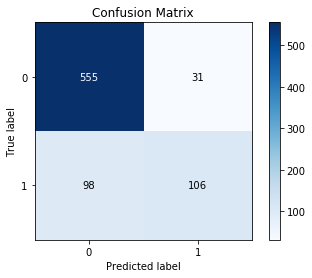

In [67]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predictions)